<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/clustering_02_kmeans_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Clustering: unsupervised classification</h1></center> 
<center><h2>K-Means</h2></center> 
<hr style="border-width:2px;border-color:#75DFC1"> 



**Context and objective**

> The purpose of this exercise is to study, implement and test the algorithm **K-means**, One of the classiﬁcation algorithms. A brief description of the algorithm and an example are given below.



**Skills required**

> - Introduction to Python language
>
>
> - Introduction to Pandas
>
>
> - Introduction to Numpy
>
>
> - Introduction to data visualization with Matplotlib
>
>
> - Introduction to Scikit-learn


**Instructions**

> The exercise is made up of several questions. Answer them in order and be careful to use the correct variable names.


<hr style="border-color:#75DFC1">
<center><h3>1. Data preparation and modeling</h3></center>
<hr style="border-color:#75DFC1">

>The database that we will use in this exercise is called *ruspini *.<br>
> This dataset consists of 75 points divided into four groups, making it ideal for illustrating clustering techniques.

* **(a)** Import the library **pandas** under the name **pd**.


* **(b)** Import the library **numpy** under the name **np**.


* **(c)** Import the package **matplotlib.pyplot** under the name **plt**.


* **(d)** Import the submodule **KMeans** of the module **sklearn.cluster**.


* **(e)** Read the file *ruspini.csv* in a `Dataframe` called **`df`**.


* **(f)** Display the first five lines of data frame **`df`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
The file <i>ruspini.csv</i> contains the indices of the <i>dataset</i>. The <code style="background:transparent;">index_col</code>, type<code style="border-width:1px;background:transparent;">String</code> parameter, allows you to specify the column to be used as row labels for the <i>Dataframe</i>.
</div> 



In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Import of the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Reading the "Ruspini.csv" file
url = "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/"
df = pd.read_csv(url+"ruspini.csv", index_col = 'indices')

# Display of the first 5 lines of the dataset
df.head(5)


,x,y
indices,,
1,4,53
2,5,63
3,10,59
4,9,77
5,13,49



> ### Data visualization
>
>Visualization of data is an excellent solution to recognize relationships between the attributes of the data set.<br>
>In the case of a simple unsupervised classification, viewing the data allows, for example, to identify the number of **clusters** (*i.e* similar groups).</p>
>
> In the case of data *ruspini*, just draw the point cloud $(x, y)$.

* **(g)** Draw the cloud of points *ruspini* and display the graphic.



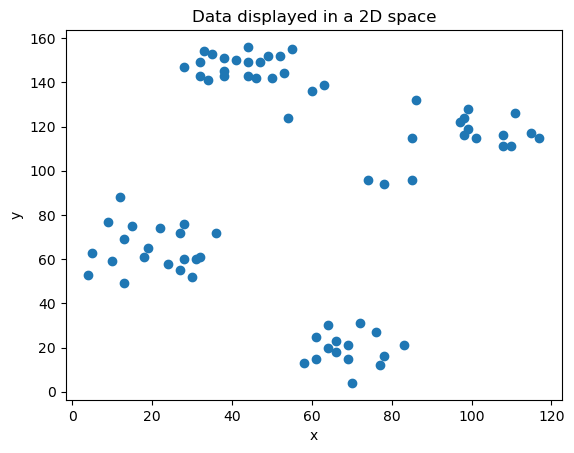

In [2]:
# Visualization of data
plt.scatter(df['x'],df['y'])
plt.ylabel('y')
plt.xlabel('x')
plt.title('Data displayed in a 2D space')
plt.show()



> #### Detecting outliers
>
>The box plot is a useful graphical display for describing the behavior of data in the middle and at the ends of distributions. It uses the median and the lower and upper quartiles.<br>
> Values outside the box plot are considered outliers. An outlier is a value or observation that is distant from the other observations made, i.e., it contrasts greatly with the measured values.
> 
><img src='https://datascientest.fr/train/assets/boxplot.png'>
> 
><div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
The <b>matplotlib.pyplot</b> submodule allows you to plot box plots for a series of numerical values. It has a <code style =" background:transparent;">boxplot</code> function that allows you to plot multiple box plots for a list of numerical series passed as parameters. 
</div> 

* **(h)** Draw the box diagrams of the two explanatory variables: `x` and `y`.



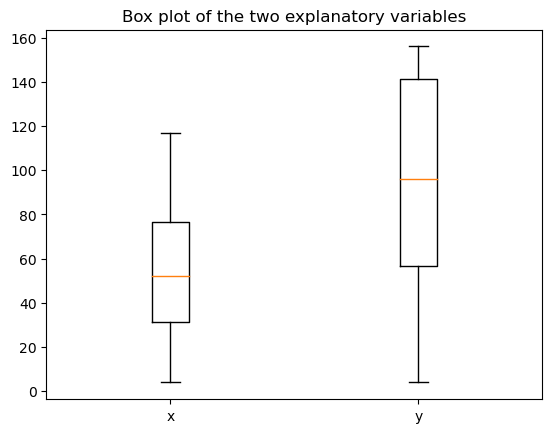

In [3]:
# Box diagram (boxplot) of all explanatory variables
liste = [df['x'], df['y']]
plt.figure()
plt.title('Box plot of the two explanatory variables')
plt.boxplot(liste, labels = ['x', 'y'])
plt.show()



<hr style="border-color:#75DFC1">
<center><h3>2. Data learning</h3></center>
<hr style="border-color:#75DFC1">

> #### K-Means: from theory to practice
>
>K-means partitioning is a **clustering** method widely used in **unsupervised learning**.<br>
>Given points and an integer k, the algorithm aims to divide the points into k groups, called **clusters**, that are homogeneous and compact.
>
> The algorithm is described by the following pseudocode: 
>> * Choose k centroids randomly.
>>
>>
>> * Calculate the distances with the k-centroids for each point in the *dataset*.
>>
>>
>> * Assign each point to the nearest centroid.
>>
>>
>> * Update the centroids as the center of the new *clusters* obtained.
>>
>>
>> * Repeat the previous operations until the centroids converge.
> 
> The two graphics below illustrate the different stages of the algorithm well:
<img src = 'https://datascientest.fr/train/assets/kmeans2.gif'>
<img src = 'https://datascientest.fr/train/assets/kmeans.gif'>
> 
>Unlike the **k-medoids** algorithm, which necessarily takes points from the *dataset* as centroids, the **k-means** algorithm has randomly selected centroids that are not usually points from the *dataset*.<br>
> The random selection of points at the beginning means that the algorithm is not deterministic and the output is usually different each time it is run.
> 
> The **`sklearn.cluster`** package implements the **`'kmeans'`** algorithm. The `KMeans` function initializes a classifier that allows the k-means algorithm to be applied.
>
> It is very easy to use:
>>* ``clf = KMeans(n_clusters = K)``: initializes a **`clf`** classifier that uses K centers and ultimately constructs K clusters.
>>
>>
>>* ``clf.fit(data)``: executes the k-means algorithm on the data set **`data`**, using K centers.
>
>At the end of its execution, ``KMeans`` has associated each data point with a group, and the groups are numbered from $0$ to $(K-1)$.<br>
> ``KMeans`` provides a list containing the following objects::
>> *labels_*: a vector containing the group number for each data point.
>>
>>
>> *cluster__centers__*: a list of the positions of the K centroids.

* **(a)** Create a classifier, **`kmeans`**, using 2 centers.


* **(b)** Train the algorithm on the training set **`df`**.


* **(c)** Calculate the positions of the centroid ks and the *labels* of the *data set* **`df`**.



In [4]:
# K-means algorithm
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)

# Centroids and Labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_



> #### Visualization of clusters
>
>The visualization of *clusters* allows you to know the distribution of models and attributes of the data set.<br>
> For example, after classifying the various customers of a bank, the visualization of clusters will allow better understanding of the characteristics of each group. This *clustering* will allow the bank's marketing pole to define a marketing strategy for each *cluster*.
>
>In the case of data *ruspini*, the code cell below allows the point cloud $(x, y)$.<br>
> Each couple of points is attributed to its *corresponding cluster*. The centroids correspond to the blue dots in the figure.


* **(d)** Execute the code cell below.



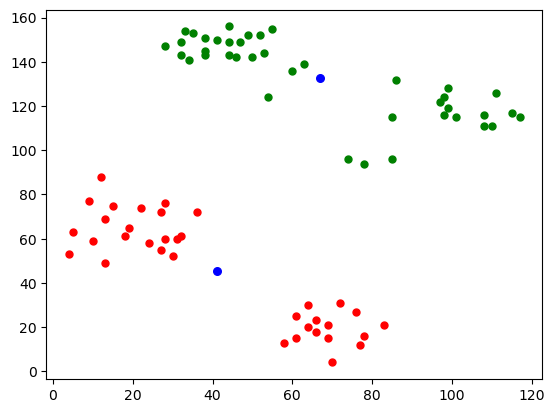

In [5]:
# Visualization of clusters and centroids

# Color List
colors = ["g.","r."]

# Graphic of the point cloud assigned to the corresponding cluster
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Centroid graphic
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()



> ####
>
>In view of the graphic above, the choice of `k = 2` does not seem optimal because certain points are far from the other points of their cluster.<br>
> The number of clusters is generally not known a priori, nevertheless the choice of k is critical for the results of **k-Means**.
>
> In order to find the optimal number of clusters, the Elbow Method allows you to obtain the best partitioning of the data. To do this, you must find the **k** which minimizes the sum of the squares of the distance from each point to its centroid **inside** of each cluster (*$SS_W$* for Sum of Squares Within Clusters):
> <center> $SS_W = \sum_{i=1}^{N} \sum_{x \in C_{i}} d(x, \tilde x_{C_{i}})^2$ </center></p>
>
> For a low $SS_W$, *clusters* are more compact. In order to separate the *clusters*, you must maximize the sum of the squares of the distances **between** the clusters (*$SS_B$* for Sum of Squares Between Clusters):
><center> $SS_B = \sum_{i=1}^{N} \mid n_{i}\mid \cdot d(\tilde x, \tilde x_{n_{i}})^2$</center></p>
>
>> * $N$ corresponds to the number of *clusters*
>>
>>
>> * $n_{i}$ corresponds to the number of samples of $i^{th}$ *cluster*
>>
>>
>> * $\tilde x_{C_{i}}$ corresponds to the centroid of *cluster* $C_{i}$  
>>
>>
>> * $\tilde x$ corresponds to the sample mean  
> 
> Choosing the optimal number of *clusters* **k** involves balancing the compactness of the clusters with their separation.<br>
> When the number of *clusters* increases, **$SS_W$** decreases but **$SS_B$** increases.<br>
> Depending on the characteristics of the problem, **k** is chosen using the following technique :  
>>* Plot the curve of the distortion **$\frac{SS_W}{SS_W + SS_B}$** as a function of **k**.
>>
>>
>> * Look for a break in the curve (elbow) followed by a steady decrease after an accelerated decrease.
>>
>>
>>* Consider the first integer greater than or equal to the break as the optimal **k**.
>  
> The **scipy.spatial.distance** package implements the `cdist` function, which calculates the distance between observations of any dimension. The distortion is calculated as follows:
> <center>$\textit{distorsion} = \frac{\sum\limits_{i}^{n} \textit{cdist}(x_i, c_i)}{\textit{n}}$</center>
>
>> * $x_i$ corresponds to the observation $i$ of *data set*
>>
>>
>> * $c_i$ corresponds to the centroid corresponding to $x_i$
>>
>>
>>* $n$ corresponds to the number of observations</p>



* **(e)** Import the function `cdist` of the package **scipy.spatial.distance**.


* **(f)** For each value of **k** $\in \{2, 3, 4, 5, 6\}$, train the algorithm **KMeans** on the training set **`df`**.


* **(g)** Calculate the distortion for each model built.



In [10]:
# Import of the cdist function of the scipy.spatial.distance package
from scipy.spatial.distance import cdist

# List of cluster numbers
range_n_clusters = [2, 3, 4, 5, 6]  

# Initialization of the distortion list
distorsions = []

# Calculation of distortions for different models
for n_clusters in range_n_clusters:
    
    # Initialization of a cluster with a number of clusters n_Clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    # Data learning based on the cluster built above
    cluster.fit(df)
    
    # Adding the new distortion to the data list
    distorsions.append(sum(np.min(cdist(df, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(df, axis = 0))



> After calculating the distortions, it is necessary to visualize the graph of distortions as a function of the number of clusters in order to choose the optimal number **k**.
* **(h)** Plot the distortions graph as a function of the number of clusters.



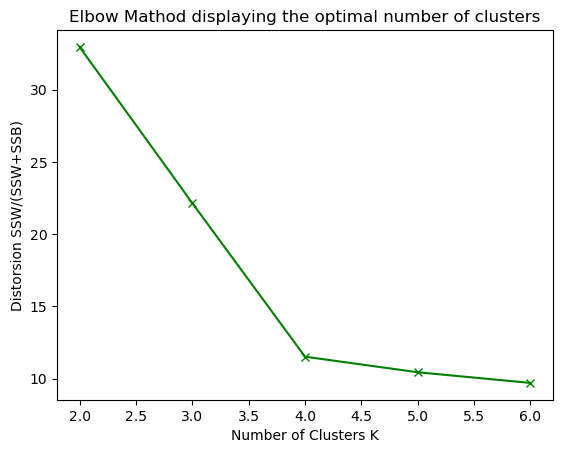

In [11]:
# Visualization of distortions based on the number of clusters
plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Elbow Mathod displaying the optimal number of clusters')
plt.show()



> The curve obtained decreases strongly and changes its trajectory after `k = 4`. Thus, the *optimal number* of clusters is `4`.

* **(i)** Retrain the algorithm on the training set **`df`** using `4` separation classes.


* **(j)** Calculate the positions of the K centroids and the *labels* of the *data set* **`df`**.



In [8]:
# K-means algorithm
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)

# Centroids and Labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_



> The code cell below plots the scatter plot $(x, y)$<br>
>  Each pair of points is assigned to its corresponding cluster. The centroids correspond to the blue points in the figure. This plot displays four groups.

* **(k)** Run the code cell below.



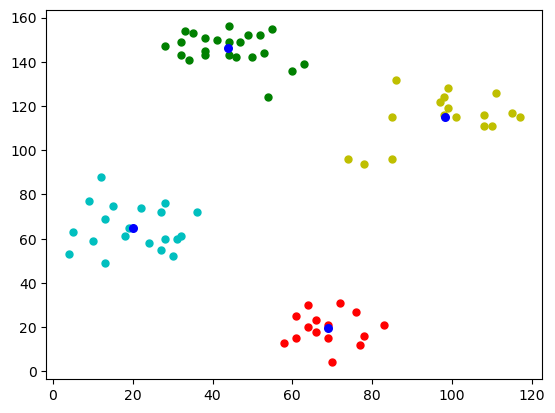

In [9]:
# Visualization of clusters and centroids

# Color List
colors = ["g.","r.","c.","y."]

# Graph of the scatter plot assigned to the corresponding cluster
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Graph of the Centroids
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()



>  Using four separation classes, the groups are compact and well separated.
>
>The *K-Means** method generally attempts to create clusters with approximately the same radius. However, this method is no longer effective when *clusters* overlap.<br>
> In fact, when applying the **``kmeans``** algorithm with three separation classes to the data in the left figure, the *clusters* obtained (shown in the right figure) are neither compact nor separate<br>
> Thus, a **grouping that minimizes the intra-class distance is not always effective**.
>
><div><img src='https://datascientest.fr/train/assets/circles.png' , style="float: left; width:50%;"><img src= 'https://datascientest.fr/train/assets/kmeans_circles.png', style="float: left; width:50%;"></div>

